Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


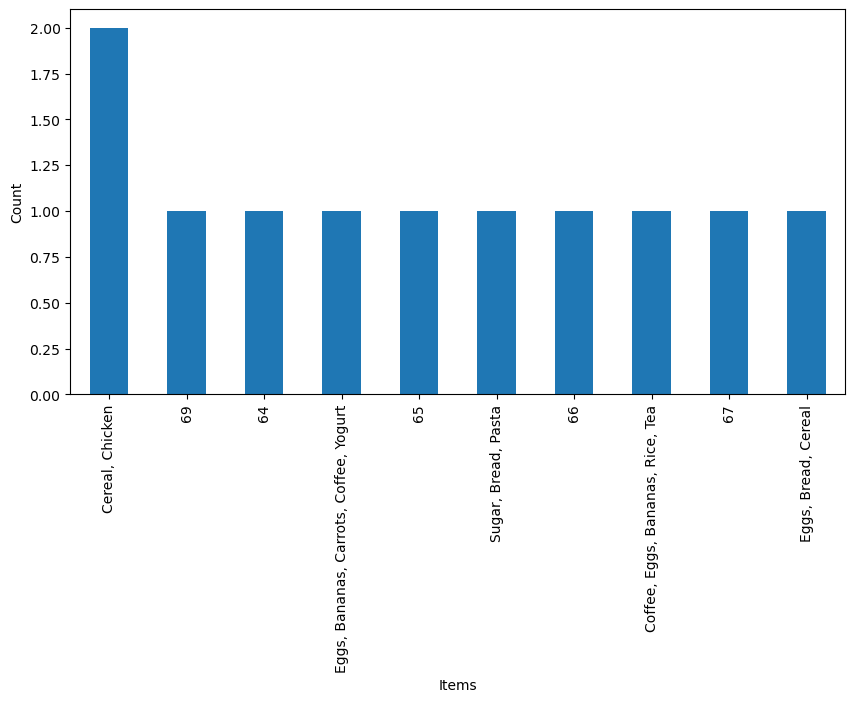

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("Day 30 Market_Basket_Data.csv", header=None)

transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

encoder = TransactionEncoder()
encoded_data = encoder.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)

frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)

if frequent_itemsets.empty:
    print("No frequent itemsets found. Reducing the min_support further may help.")
else:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    top_rules = rules.sort_values(by="confidence", ascending=False).head(5)
    print(top_rules)

    item_counts = df.stack().value_counts()
    plt.figure(figsize=(10, 5))
    item_counts[:10].plot(kind='bar')
    plt.xlabel("Items")
    plt.ylabel("Count")
    plt.show()

#### Observations
Frequently Bought Together Items:
- Based on high support and lift values.

Importance of Lift:
- Lift > 1 indicates a strong positive association.

High Support, Low Confidence:
- Popular items but weak dependency in transactions.

Effect of Increasing Support:
- Fewer but more reliable rules.

Business Strategies:
1. Bundle frequently bought items for promotions.
2. Optimize store layout by placing associated items together.